In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# process model
Kp = 5.0 #原來參數：3.0；改為10.0，表示100%。
taup = 3000.0 #原來參數：5.0；改為200，表示20秒。
def process(y,t,u,Kp,taup):
    # Kp = process gain
    # taup = process time constant
    dydt = -y/taup + Kp/taup * u
    return dydt

In [3]:
# Second order ODE Integrator
#def model1(x,t):
#    y = x[0]
#    dydt = x[1]
#    dy2dt2 = (-2.0*zeta*tau*dydt - y + Kp*du)/tau**2
#    return [dydt,dy2dt2]
#t1 = np.linspace(0,10,100)
#x1 = odeint(model1,[0,0],t1)
#y1 = x1[:,0]

In [4]:
# specify number of steps
ns = 100000
# define time points
t = np.linspace(0,ns/10,ns+1)
delta_t = t[1]-t[0]

In [5]:
# noise
noise= 0.5*np.sin(np.linspace(0., (ns/10000.)*np.pi, ns+1))

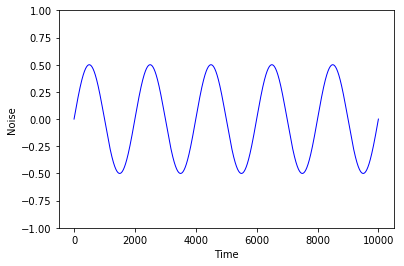

In [6]:
plt.figure(1)
plt.plot(t,noise,'b',linewidth=1)
plt.ylim([-1, 1])
plt.xlabel('Time')
plt.ylabel('Noise')
plt.show()

In [7]:
# storage for recording values
op = np.zeros(ns+1)  # controller output
pv = np.zeros(ns+1)  # process variable
e = np.zeros(ns+1)   # error
ie = np.zeros(ns+1)  # integral of the error
dpv = np.zeros(ns+1) # derivative of the pv
P = np.zeros(ns+1)   # proportional
I = np.zeros(ns+1)   # integral
D = np.zeros(ns+1)   # derivative
sp = np.zeros(ns+1)  # set point
sp[25:] = 5.0          # 原本時間設定25
# sp[5001:] = 6.66
# sp[5001:7500] = 7.5
# sp[7501:] = 2.5

In [8]:
# PID (starting point)
Kc = 1/Kp #原本為1.0/Kp
tauI = 1*taup #原本為taup
tauD = 0.0 #原本為0.0

In [9]:
# PID (tuning)
Kc = Kc * 2 #原本為Kc * 2
tauI = tauI / 2 #原本為tauI / 2
tauD = 1.0 #原本為 1.0

In [10]:
# Upper and Lower limits on OP
op_hi = 10.0
op_lo = 0.0

In [11]:
def PID_control(Kc, tauI, tauD):
    for i in range(0,ns):
        e[i] = sp[i] - pv[i]
        if i >= 1:  # calculate starting on second cycle
            dpv[i] = (pv[i]-pv[i-1])/delta_t
            ie[i] = ie[i-1] + e[i] * delta_t
        P[i] = Kc * e[i]
        I[i] = Kc/tauI * ie[i]
        D[i] = - Kc * tauD * dpv[i]
        op[i] = op[0] + P[i] + I[i] + D[i]
        if op[i] > op_hi:  # check upper limit
            op[i] = op_hi
            ie[i] = ie[i] - e[i] * delta_t # anti-reset windup
        if op[i] < op_lo:  # check lower limit
            op[i] = op_lo
            ie[i] = ie[i] - e[i] * delta_t # anti-reset windup
        y = odeint(process,pv[i],[0,delta_t],args=(op[i]+noise[i],Kp,taup)) 
        pv[i+1] = y[-1] 
    op[ns] = op[ns-1]
    ie[ns] = ie[ns-1]
    P[ns] = P[ns-1]
    I[ns] = I[ns-1]
    D[ns] = D[ns-1]

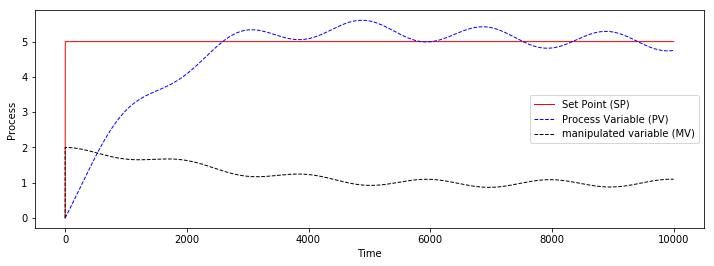

In [12]:
PID_control(Kc, tauI, tauD)

# plot results
plt.figure(figsize=(12,4)) # set the figure size to 18 x 9 inches
plt.plot(t,sp,'r-',linewidth=1)
plt.plot(t,pv,'b--',linewidth=1)
plt.plot(t,op,'k--',linewidth=1)
plt.legend(['Set Point (SP)','Process Variable (PV)', 'manipulated variable (MV)'],loc='best')
plt.ylabel('Process')
plt.xlabel('Time')
plt.show()

# Try different Kc, tauI, tauD

Kc= 0.30000000000000004  tauI = 2000.0  tauD = 1.0
Kc= 0.45000000000000007  tauI = 1333.3333333333333  tauD = 2.0
Kc= 0.675  tauI = 888.8888888888888  tauD = 3.0
Kc= 1.0125000000000002  tauI = 592.5925925925925  tauD = 4.0
Kc= 1.5187500000000003  tauI = 395.06172839506166  tauD = 5.0
Kc= 2.278125  tauI = 263.37448559670776  tauD = 6.0
Kc= 3.4171875000000003  tauI = 175.58299039780516  tauD = 7.0
Kc= 5.12578125  tauI = 117.05532693187011  tauD = 8.0
Kc= 7.688671875000001  tauI = 78.03688462124674  tauD = 9.0


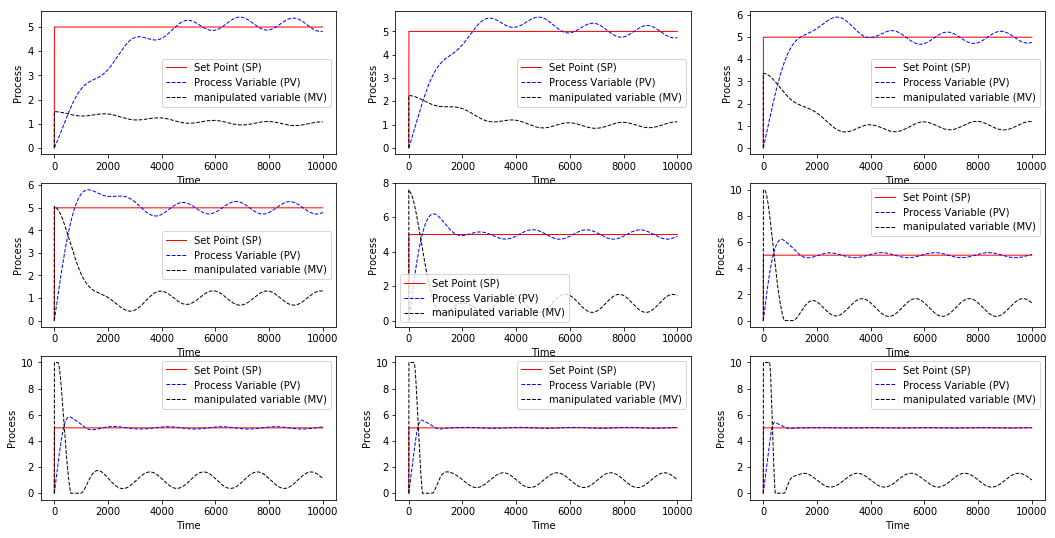

In [13]:
# PID (starting point)
Kc = 1/Kp #原本為1.0/Kp
tauI = 1*taup #原本為taup
tauD = 0.0 #原本為0.0

plt.figure(figsize=(18,9)) 
for i in range(9):
    # PID (tuning)
    Kc = Kc * 1.5 
    tauI = tauI/1.5 
    tauD = tauD +1.0 
    print("Kc=", Kc, " tauI =", tauI, " tauD =", tauD)
    PID_control(Kc, tauI, tauD)
    plt.subplot(3, 3, i+1) # 3 rows * 3columns
    plt.plot(t,sp,'r-',linewidth=1)
    plt.plot(t,pv,'b--',linewidth=1)
    plt.plot(t,op,'k--',linewidth=1)
    plt.legend(['Set Point (SP)','Process Variable (PV)', 'manipulated variable (MV)'],loc='best')
    plt.ylabel('Process')
    plt.xlabel('Time')
plt.show()

# Try different set values

In [14]:
sp[:25000] = 2.5          
sp[25001:50000] = 5.0     
sp[50001:75000] = 7.5     
sp[75001:] = 2.5       

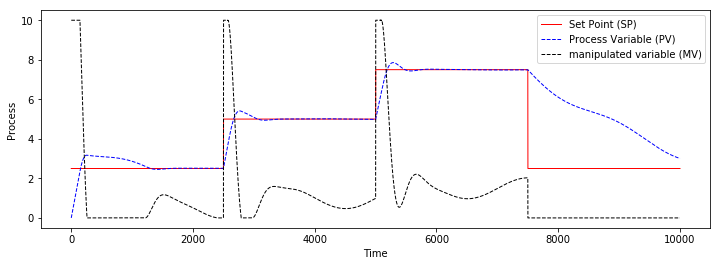

In [15]:
PID_control(Kc, tauI, tauD)

# plot results
plt.figure(figsize=(12,4)) # set the figure size to 18 x 9 inches
plt.plot(t,sp,'r-',linewidth=1)
plt.plot(t,pv,'b--',linewidth=1)
plt.plot(t,op,'k--',linewidth=1)
plt.legend(['Set Point (SP)','Process Variable (PV)', 'manipulated variable (MV)'],loc='best')
plt.ylabel('Process')
plt.xlabel('Time')
plt.show()

# Try different processes

Kc= 0.30000000000000004  tauI = 2000.0  tauD = 1.0
Kc= 0.45000000000000007  tauI = 1333.3333333333333  tauD = 2.0
Kc= 0.675  tauI = 888.8888888888888  tauD = 3.0
Kc= 1.0125000000000002  tauI = 592.5925925925925  tauD = 4.0
Kc= 1.5187500000000003  tauI = 395.06172839506166  tauD = 5.0
Kc= 2.278125  tauI = 263.37448559670776  tauD = 6.0
Kc= 3.4171875000000003  tauI = 175.58299039780516  tauD = 7.0
Kc= 5.12578125  tauI = 117.05532693187011  tauD = 8.0
Kc= 7.688671875000001  tauI = 78.03688462124674  tauD = 9.0


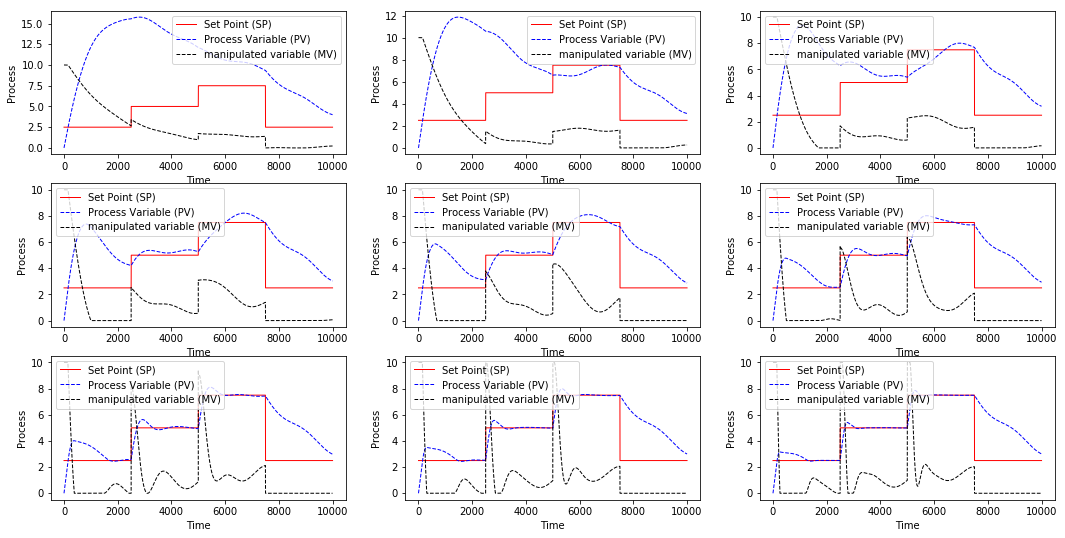

In [16]:
# PID (starting point)
Kc = 1/Kp #原本為1.0/Kp
tauI = 1*taup #原本為taup
tauD = 0.0 #原本為0.0

plt.figure(figsize=(18,9)) 
for i in range(9):
    # PID (tuning)
    Kc = Kc * 1.5 
    tauI = tauI/1.5 
    tauD = tauD +1.0 
    print("Kc=", Kc, " tauI =", tauI, " tauD =", tauD)
    PID_control(Kc, tauI, tauD)
    plt.subplot(3, 3, i+1) # 3 rows * 3columns
    plt.plot(t,sp,'r-',linewidth=1)
    plt.plot(t,pv,'b--',linewidth=1)
    plt.plot(t,op,'k--',linewidth=1)
    plt.legend(['Set Point (SP)','Process Variable (PV)', 'manipulated variable (MV)'],loc='best')
    plt.ylabel('Process')
    plt.xlabel('Time')
plt.show()